In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing.csv


In [5]:
df = pd.read_csv("AmesHousing.csv")


In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df = df[numerical_features].dropna()

In [11]:
X = df[["Gr Liv Area"]]
y = df["SalePrice"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = lr.predict(X_test)

In [14]:
predictions

array([177178.10045867, 160575.77239406, 202562.819456  , 172606.44490465,
       271979.79984208, 155282.2764894 , 161056.99929448, 179103.00806036,
       233481.64780821, 207134.47501003, 184516.81069013, 167312.94899999,
       111490.62855087, 331892.5489448 , 107881.4267977 , 190772.76039563,
       228669.37880397, 210984.29021341, 294356.85071177, 310838.87205127,
       183915.2770646 , 150710.62093538, 182952.82326375, 102106.70399262,
       188727.54606883, 178742.08788504, 616899.18072056, 145296.81830562,
       190171.2267701 , 108362.65369812, 142289.15017797,  99700.5694905 ,
       393489.59219899, 182471.59636333, 110046.9478496 , 143732.83087924,
       112693.69580193, 200036.37822878, 168155.09607573, 201961.28583047,
       251888.5767494 , 231556.74020651, 303018.93491939, 220488.52149678,
       167794.17590041, 166591.10864935, 129055.41041633, 137717.49462395,
       189329.07969436, 182712.20981354, 167794.17590041, 322268.01093633,
       165388.0413983 , 3

In [15]:
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 3371955560.679714


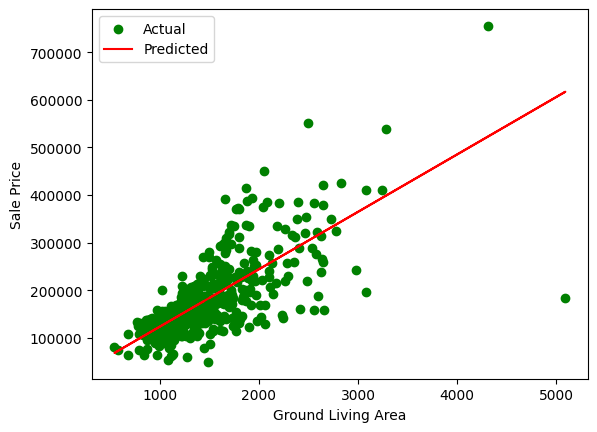

In [19]:
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

In [ ]:
print("\nMultiple Linear Regression")
X = df[["Gr Liv Area", "Overall Qual", "Garage Cars"]]
y = df["SalePrice"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)


LinearRegression()

In [24]:
predictions = mlr.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 1722458819.4843705


In [25]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
plr = LinearRegression()
plr.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = plr.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 1380438571.1114821
